In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
training = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


Almost all columns are filled except `Cabin`, this is a big loss, a very important parameter.
From the information can see which values are numeric and which are categorical values. Would need to work on them.

In [11]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
training.describe().columns  # numeric only

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [73]:
# look at numeric and categorical values separately 
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# Nummerical

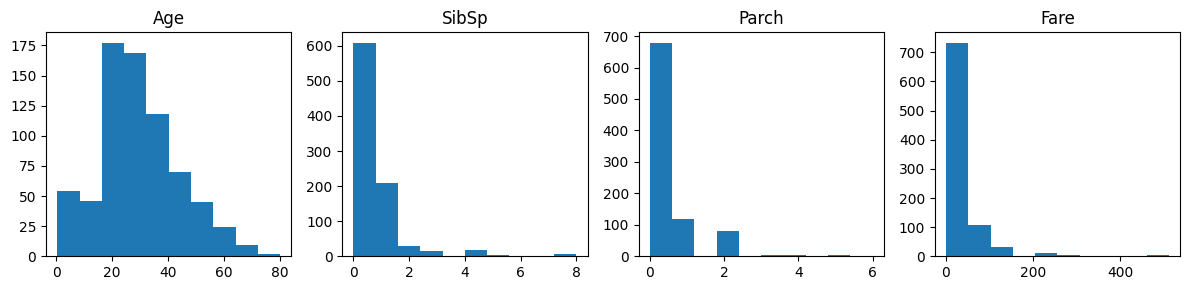

In [44]:
#distributions for all numeric variables 

num_columns = len(df_num.columns)
num_rows = 1  # Display all histograms in a single row

# Set the size of the entire subplot grid
plt.figure(figsize=(num_columns * 3, 3))

for idx, col in enumerate(df_num.columns):
    plt.subplot(num_rows, num_columns, idx + 1)
    plt.hist(df_num[col])
    plt.title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

TODO: print plot with col+Survived rate

In [45]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


There is a small correlation between Fare and family members on the odds of survival.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

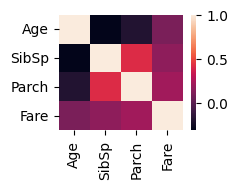

In [51]:
print(df_num.corr())
plt.figure(figsize=(2, 1.5))
sns.heatmap(df_num.corr())

# Categorical

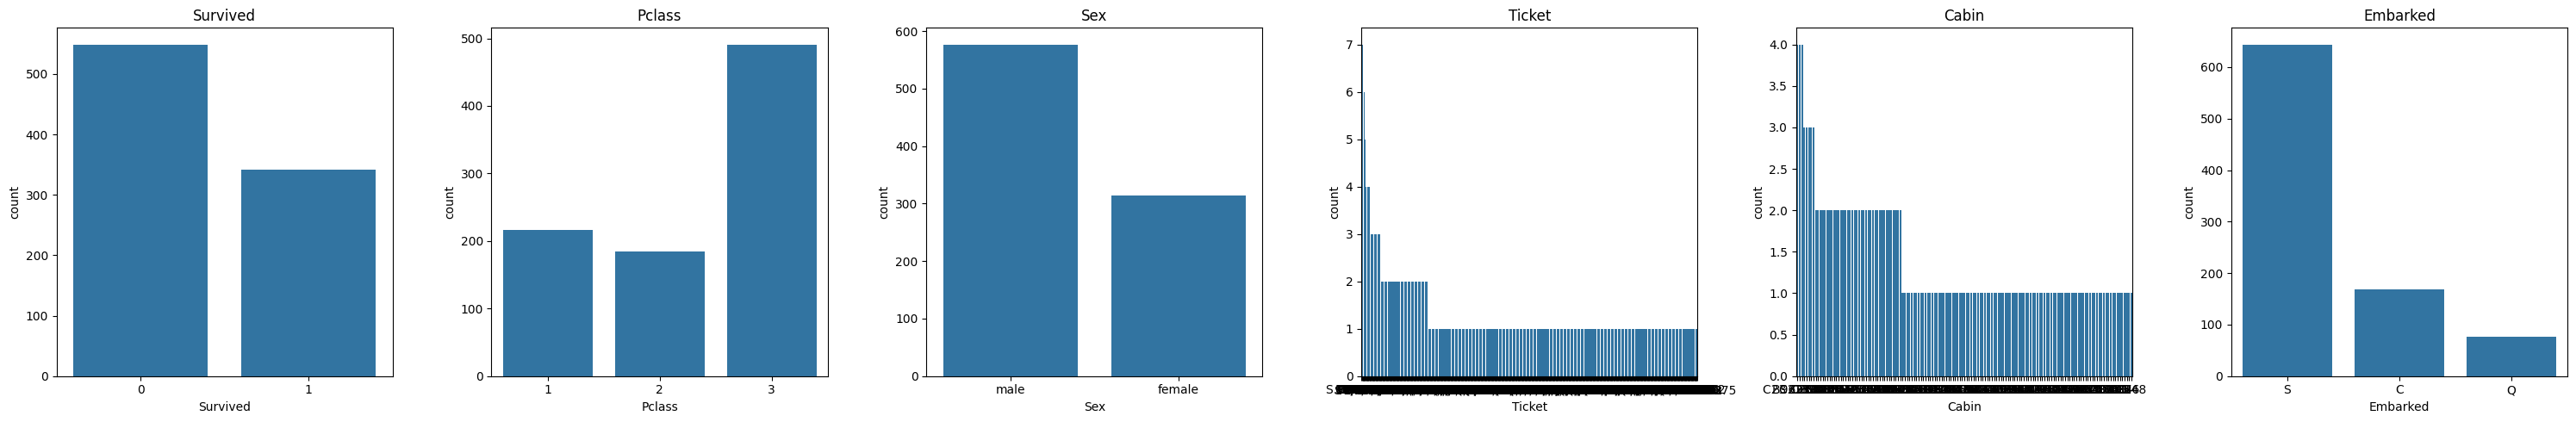

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(df_cat.columns)
num_rows = 1  # Display all bar plots in a single row

# Set the size of the entire subplot grid
plt.figure(figsize=(num_columns * 5, 5))

for idx, col in enumerate(df_cat.columns):
    plt.subplot(num_rows, num_columns, idx + 1)
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [78]:
print(df_cat.head(100))


    Survived  Pclass     Sex            Ticket    Cabin Embarked
0          0       3    male         A/5 21171      NaN        S
1          1       1  female          PC 17599      C85        C
2          1       3  female  STON/O2. 3101282      NaN        S
3          1       1  female            113803     C123        S
4          0       3    male            373450      NaN        S
..       ...     ...     ...               ...      ...      ...
95         0       3    male            374910      NaN        S
96         0       1    male          PC 17754       A5        C
97         1       1    male          PC 17759  D10 D12        C
98         1       2  female            231919      NaN        S
99         0       2    male            244367      NaN        S

[100 rows x 6 columns]
